[Link](https://datafai.com/auto-arima-using-pyramid-arima-python-package/)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=18,9

# Load specific forecasting tools
from statsmodels.tsa.arima_model import ARIMA,ARIMAResults
from statsmodels.tsa.seasonal import seasonal_decompose

# for determining (p,q) orders
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
# for determining ARIMA orders
from pmdarima import auto_arima 

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")



In [2]:
# Load datasets
df1 = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'
df1.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


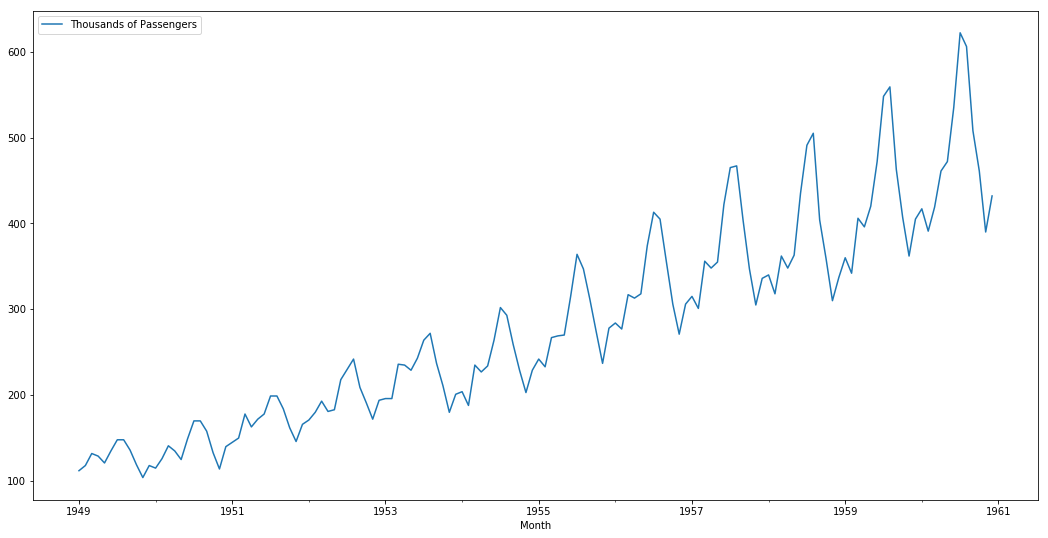

In [3]:
df1.plot();

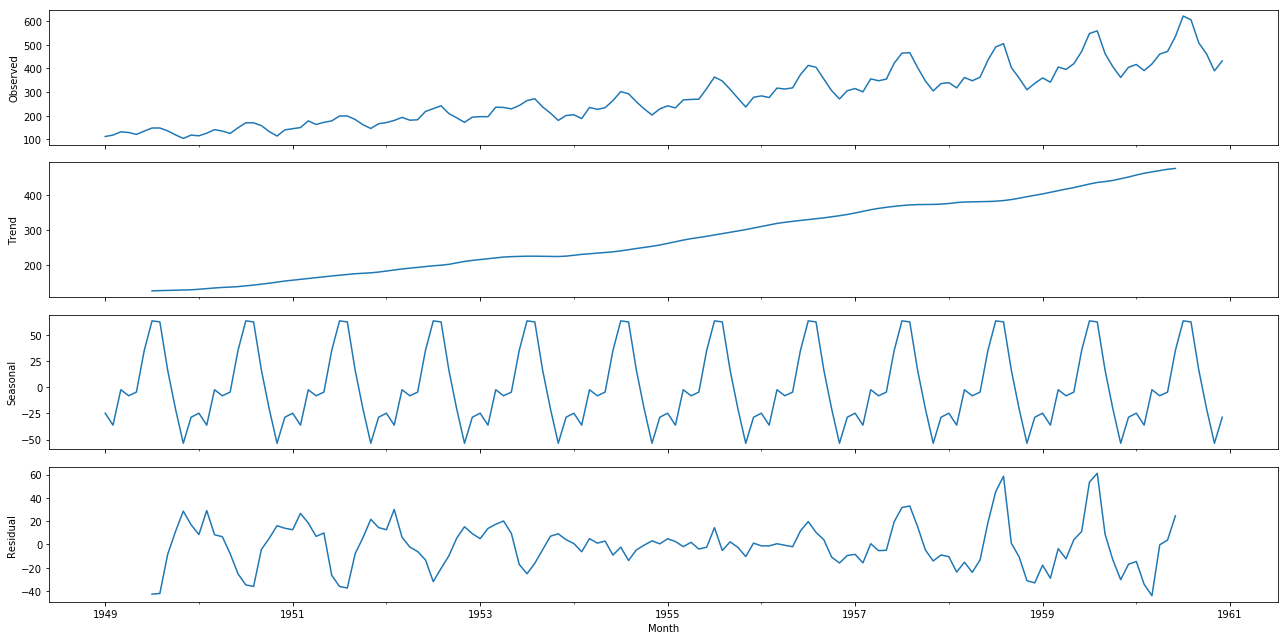

In [4]:
data_decompose = seasonal_decompose(df1['Thousands of Passengers'])
data_decompose.plot();

## Stationarity Test

In [5]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha=0.05); 
adf_test.is_stationary(df1["Thousands of Passengers"])

(0.01, False)

In [6]:
len(df1["Thousands of Passengers"])

144

In [7]:
train, test = df1["Thousands of Passengers"][:132], df1["Thousands of Passengers"][132:]
print(len(test)); print(len(train));

12
132


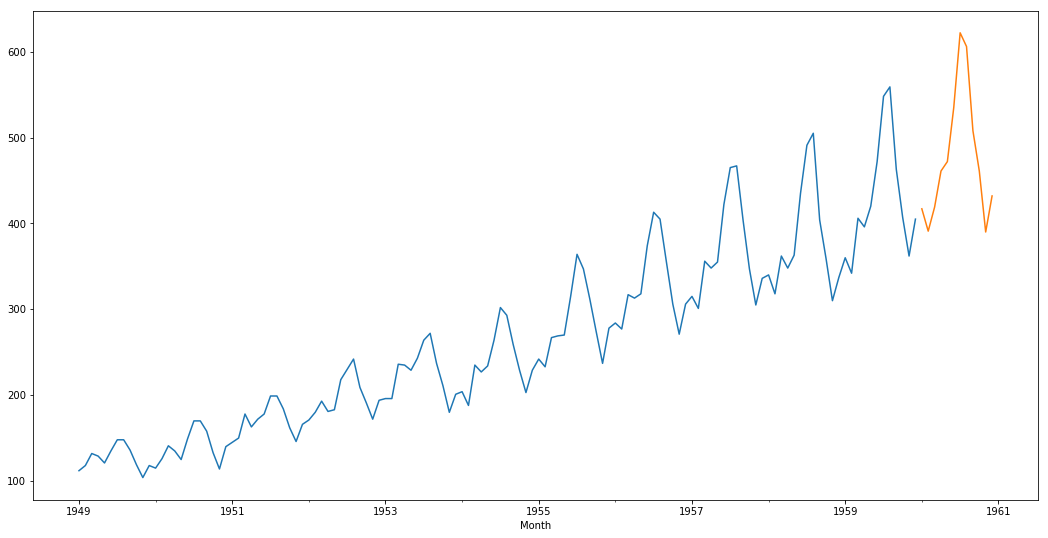

In [8]:
train.plot()
test.plot();

In [9]:
arima_model = auto_arima(train, seasonal=True, m=12, trace=True)
arima_model.summary()

Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=1277.589, BIC=1283.340, Fit time=0.039 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=1169.975, BIC=1181.476, Fit time=0.508 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 12); AIC=1264.738, BIC=1273.363, Fit time=0.231 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=1165.402, BIC=1179.778, Fit time=0.741 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 1, 12); AIC=1170.780, BIC=1182.280, Fit

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(0, 0, 1, 12)   Log Likelihood                -563.096
Date:                            Tue, 14 Jul 2020   AIC                           1140.192
Time:                                    23:52:11   BIC                           1160.318
Sample:                                         0   HQIC                          1148.370
                                            - 132                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7229      0.494      1.462      0.144      -0.246       1.692
ar.L1          1.6997      0.025     68.381      0.000       1.651       1.748
ar.L2         -0.9624      0.022    -43.849      0.000      -1.005      -0.919
ma.L1         -1.8165      0.975     -1.863      0.062      -3.728       0.095
ma.L2          0.9988      1.075      0.929      0.353      -1.108       3.106
ma.S.L12       0.7662      0.087      8.825      0.000       0.596       0.936
sigma2       277.0779    304.712      0.909      0.363    -320.146     874.302
===================================================================================
Ljung-Box (Q):                      239.30   Jarque-Bera (JB):                 3.03
Prob(Q):                              0.00   Prob(JB):                         0.22
Heteroskedasticity (H):               4.77   Skew:                             0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Use the best model to make predictions about the Test data-

In [10]:
predictions = pd.DataFrame(arima_model.predict(n_periods=12),index=test.index)
predictions.columns = ['Predicted_Passengers']


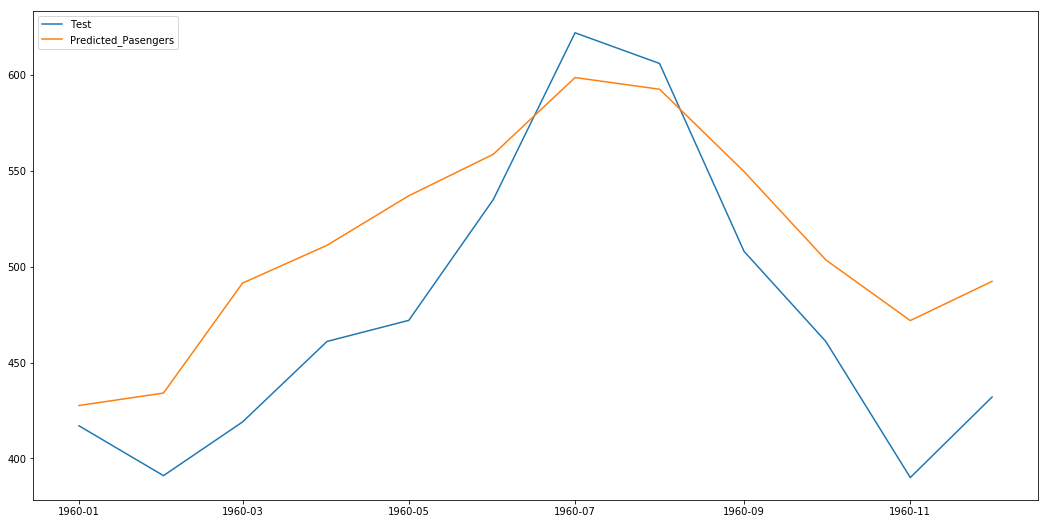

In [11]:
plt.plot(test,label="Test")
plt.plot(predictions,label="Predicted_Pasengers")
plt.legend(loc="upper left")
plt.show();

## Evaluation

In [12]:
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score, mean_squared_error

rmse_error = np.sqrt(mean_squared_error(test, predictions))
print(f'RMSE Error: {rmse_error}')
print("Test's mean:",test.mean())


r2_result = r2_score(test, predictions)
print(f"RSq: {r2_result}")

RMSE Error: 49.2673800184418
Test's mean: 476.1666666666667
RSq: 0.5618220226569113
